# Redstone gas usage - quick analysis

#### Maria Silva, February 2024

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data load 

In [2]:
gas_df = pd.read_csv("../data/redstone-gas-usage-2-weeks.csv")
gas_df["timestamp"] = pd.to_datetime(gas_df['timestamp'])
gas_df["gas_units_tho"] = gas_df["gas_units"]/1000

# Convert rows to 12 second sums
gas_df = (
    gas_df
    .groupby(pd.Grouper(key="timestamp", freq="12S"))
    [["gas_units", "gas_units_tho"]]
    .sum()
    .reset_index()
    .sort_values("timestamp")
)
gas_df = gas_df.iloc[1:-1]
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109770 entries, 1 to 109770
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   timestamp      109770 non-null  datetime64[ns, UTC]
 1   gas_units      109770 non-null  int64              
 2   gas_units_tho  109770 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 2.5 MB


In [3]:
gas_df["timestamp"].agg(["min", "max"])

min   2024-02-04 19:55:36+00:00
max   2024-02-20 01:49:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

## Stats - Thousand gas units

In [4]:
temp_df = (
    gas_df
    [["gas_units_tho"]]
    .agg(["mean", "std", "skew"])
    .round(5)
).T
temp_df["coef_var"] = (temp_df["std"]/temp_df["mean"]).round(2)
temp_df

,mean,std,skew,coef_var
gas_units_tho,905.91278,1998.64523,11.72613,2.21


In [5]:
(gas_df
 [["gas_units_tho"]]
 .quantile([0, 0.25, 0.5, 0.75, 1])
 .round(5)
).T

,0.00,0.25,0.50,0.75,1.00
gas_units_tho,281.118,302.094,302.094,319.194,65340.022


## Plots

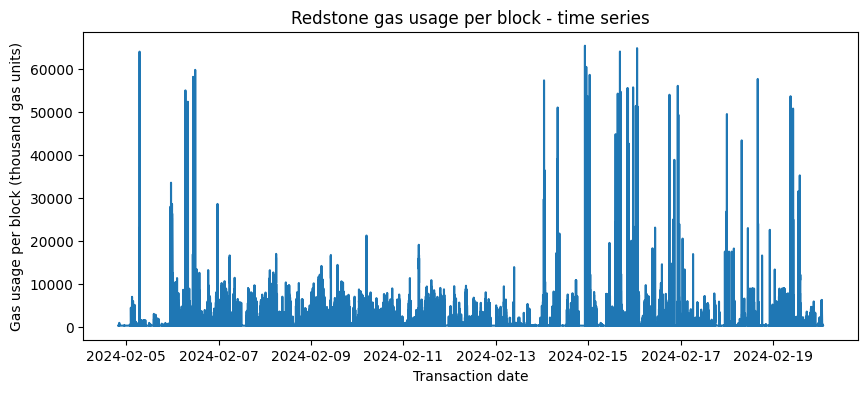

In [6]:
plt.figure(figsize=(10,4))
sns.lineplot(data=gas_df, x='timestamp', y='gas_units_tho')
plt.title("Redstone gas usage per block - time series")
plt.xlabel('Transaction date')
plt.ylabel('Gas usage per block (thousand gas units)')
plt.show()

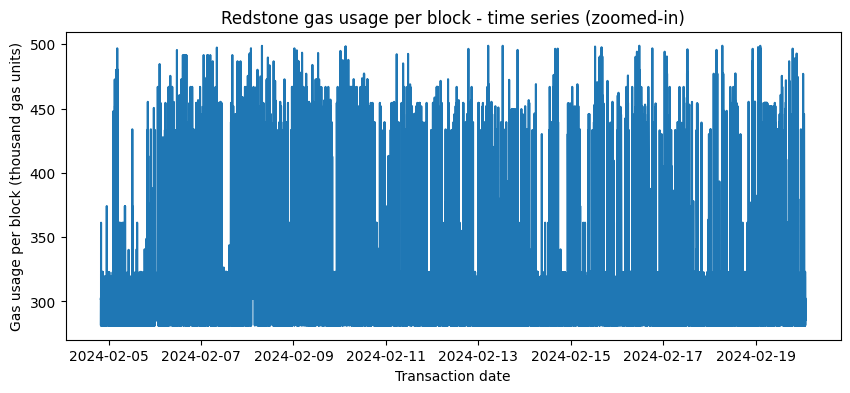

In [7]:
temp = gas_df[gas_df["gas_units_tho"]<500]
plt.figure(figsize=(10,4))
sns.lineplot(data=temp, x='timestamp', y='gas_units_tho')
plt.title("Redstone gas usage per block - time series (zoomed-in)")
plt.xlabel('Transaction date')
plt.ylabel('Gas usage per block (thousand gas units)')
plt.show()

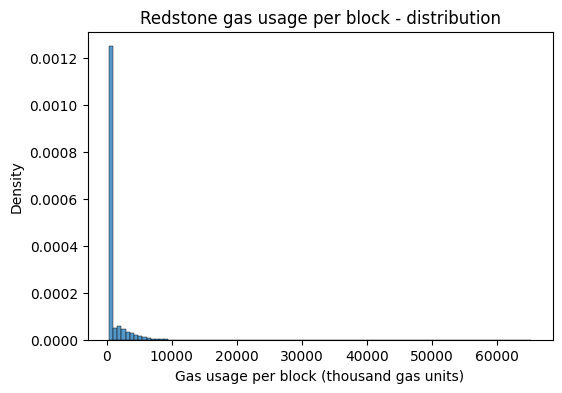

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(data=gas_df, x='gas_units_tho', stat='density', bins=100)
plt.title("Redstone gas usage per block - distribution")
plt.xlabel('Gas usage per block (thousand gas units)')
plt.ylabel('Density')
plt.show()

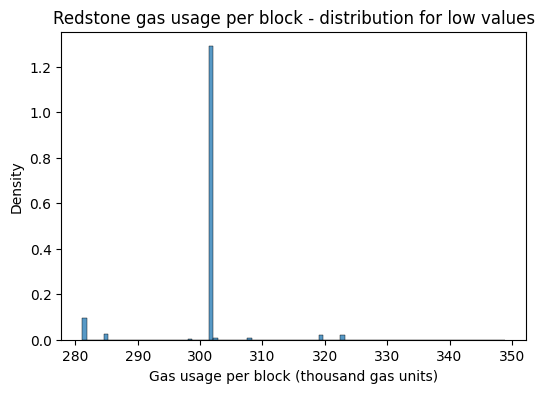

In [9]:
temp = gas_df[gas_df["gas_units_tho"]<350]
plt.figure(figsize=(6,4))
sns.histplot(data=temp, x='gas_units_tho', stat='density', bins=100)
plt.title("Redstone gas usage per block - distribution for low values")
plt.xlabel('Gas usage per block (thousand gas units)')
plt.ylabel('Density')
plt.show()

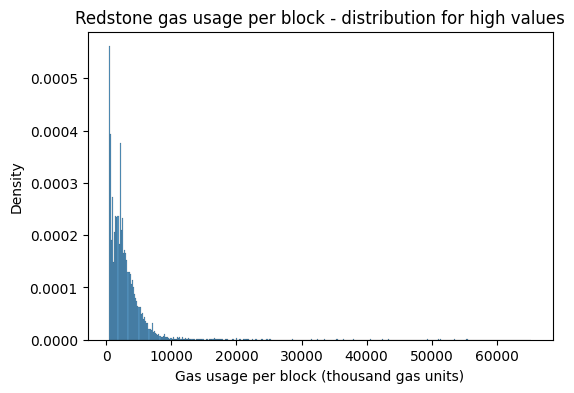

In [10]:
temp = gas_df[gas_df["gas_units_tho"]>350]
plt.figure(figsize=(6,4))
sns.histplot(data=temp, x='gas_units_tho', stat='density')
plt.title("Redstone gas usage per block - distribution for high values")
plt.xlabel('Gas usage per block (thousand gas units)')
plt.ylabel('Density')
plt.show()

In [11]:
print(sum(gas_df["gas_units_tho"]<350)/len(gas_df), sum(gas_df["gas_units_tho"]>=350)/len(gas_df))

0.7637697002824086 0.23623029971759132


In [12]:
np.round(sum(gas_df["gas_units_tho"]>350)/len(gas_df), 2)

0.24

In [13]:
np.round(sum(gas_df["gas_units_tho"]<285)/len(gas_df), 2)

0.06

In [14]:
np.round(sum(gas_df["gas_units"].between(300, 70))/len(gas_df), 2)

0.0

In [15]:
gas_df.groupby("gas_units_tho").size().sort_values(ascending=False).reset_index().head(20)

,gas_units_tho,0
0,302.094,50621
1,302.046,6172
2,302.070,6031
3,281.406,4566
4,302.058,4550
5,302.022,2316
6,302.094,2278
7,284.994,1054
8,319.194,917
9,281.334,728
